In [25]:
#!pip install spacy

In [74]:
import spacy
from nltk.stem import PorterStemmer

In [80]:
import pandas as pd

In [27]:
nlp = spacy.load("en_core_web_sm")

The en_core_web_sm model is a small English pipeline provided by spaCy, a popular open-source library for Natural Language Processing (NLP) in Python. This model is optimized for CPU usage and is designed for general-purpose NLP tasks, including tokenization, part-of-speech tagging, dependency parsing, named entity recognition, and lemmatization

While en_core_web_sm is efficient and suitable for many applications, it does not include pre-trained word vectors, which may limit its performance on tasks that rely heavily on semantic similarity. For applications requiring higher accuracy or semantic understanding, consider using larger models like en_core_web_md or en_core_web_lg, which include word vectors and are trained on more extensive datasets

In [28]:
# Extract tokens for the given doc
introduction_text = 'This tutorial is about Natural Language Processing in Spacy.'
introduction_doc = nlp(introduction_text)
# Extract tokens for the given doc
print ([token.text for token in introduction_doc])

['This', 'tutorial', 'is', 'about', 'Natural', 'Language', 'Processing', 'in', 'Spacy', '.']


In [75]:
#Sentence tockenization
about_text = ('Gus Proto is a Python developer currently working for a London-based Fintech company. He is interested in learning Natural Language Processing.')
about_doc = nlp(about_text)
sentences = list(about_doc.sents)
len(sentences)

2

In [30]:
for sentence in sentences:
   print (sentence)

Gus Proto is a Python developer currently working for a London-based Fintech company.
He is interested in learning Natural Language Processing.


In [31]:
for token in about_doc:
    print (token, token.idx)

Gus 0
Proto 4
is 10
a 13
Python 15
developer 22
currently 32
working 42
for 50
a 54
London 56
- 62
based 63
Fintech 69
company 77
. 84
He 86
is 89
interested 92
in 103
learning 106
Natural 115
Language 123
Processing 132
. 142


text_with_ws prints token text with trailing space (if present).
is_alpha detects if the token consists of alphabetic characters or not.
is_punct detects if the token is a punctuation symbol or not.
is_space detects if the token is a space or not.
shape_ prints out the shape of the word.
is_stop detects if the token is a stop word or not.

In [32]:
for token in about_doc:
    print (token, token.idx,
           token.is_alpha, token.is_punct, token.is_space,
           token.shape_, token.is_stop)

Gus 0 True False False Xxx False
Proto 4 True False False Xxxxx False
is 10 True False False xx True
a 13 True False False x True
Python 15 True False False Xxxxx False
developer 22 True False False xxxx False
currently 32 True False False xxxx False
working 42 True False False xxxx False
for 50 True False False xxx True
a 54 True False False x True
London 56 True False False Xxxxx False
- 62 False True False - False
based 63 True False False xxxx False
Fintech 69 True False False Xxxxx False
company 77 True False False xxxx False
. 84 False True False . False
He 86 True False False Xx True
is 89 True False False xx True
interested 92 True False False xxxx False
in 103 True False False xx True
learning 106 True False False xxxx False
Natural 115 True False False Xxxxx False
Language 123 True False False Xxxxx False
Processing 132 True False False Xxxxx False
. 142 False True False . False


In [33]:
import re
from spacy.tokenizer import Tokenizer
custom_nlp = spacy.load('en_core_web_sm')
prefix_re = spacy.util.compile_prefix_regex(custom_nlp.Defaults.prefixes)
suffix_re = spacy.util.compile_suffix_regex(custom_nlp.Defaults.suffixes)
infix_re = re.compile(r'''[-~]''')
def customize_tokenizer(nlp):
    # Adds support to use `-` as the delimiter for tokenization
    return Tokenizer(nlp.vocab, prefix_search=prefix_re.search,
                     suffix_search=suffix_re.search,
                     infix_finditer=infix_re.finditer,
                     token_match=None
                     )


custom_nlp.tokenizer = customize_tokenizer(custom_nlp)
custom_tokenizer_about_doc = custom_nlp(about_text)
print([token.text for token in custom_tokenizer_about_doc])

['Gus', 'Proto', 'is', 'a', 'Python', 'developer', 'currently', 'working', 'for', 'a', 'London', '-', 'based', 'Fintech', 'company', '.', 'He', 'is', 'interested', 'in', 'learning', 'Natural', 'Language', 'Processing', '.']


# New Section

In order for you to customize, you can pass various parameters to the Tokenizer class:

nlp.vocab is a storage container for special cases and is used to handle cases like contractions and emoticons.
prefix_search is the function that is used to handle preceding punctuation, such as opening parentheses.
infix_finditer is the function that is used to handle non-whitespace separators, such as hyphens.
suffix_search is the function that is used to handle succeeding punctuation, such as closing parentheses.
token_match is an optional boolean function that is used to match strings that should never be split. It overrides the previous rules and is useful for entities like URLs or numbers.

In [34]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
len(spacy_stopwords)


326

In [35]:

for stop_word in list(spacy_stopwords)[:20]:
    print(stop_word)

thereupon
really
side
itself
this
have
keep
wherein
anyhow
eight
thus
always
show
amongst
did
enough
three
five
her
when


In [36]:
about_no_stopword_doc = [token for token in about_doc if not token.is_stop]
print (about_no_stopword_doc)

[Gus, Proto, Python, developer, currently, working, London, -, based, Fintech, company, ., interested, learning, Natural, Language, Processing, .]


###Lemmantization

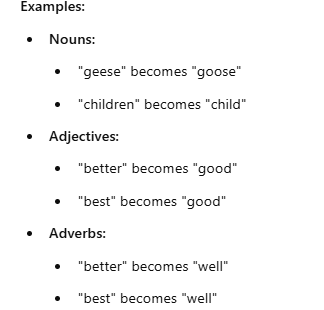

In [94]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

def lemmatize_and_stem(word):
    # Lemmatize using spaCy
    doc = nlp(word)
    lemma = doc[0].lemma_

    # Stem using NLTK's PorterStemmer
    stem = stemmer.stem(word)
    return pd.Series([lemma, stem])

# Example usage



In [98]:
verbs = [
    "running", "ran", "runs",
    "eating", "ate", "eaten",
    "writing", "wrote", "written",
    "speaking", "spoke", "spoken",
    "driving", "drove", "driven",
    "swimming", "swam", "swum",
    "singing", "sang", "sung",
    "beginning", "began", "begun",
    "choosing", "chose", "chosen",
    "flying", "flew", "flown",
    "seeing", "saw", "seen",
    "buying", "bought",
    "thinking", "thought"
]

# List of 30 common nouns
nouns = [
    "apple", "book", "car", "dog", "elephant", "flower", "guitar", "house", "island", "jacket",
    "kite", "lamp", "mountain", "notebook", "ocean", "piano", "queen", "river", "sun", "tree",
    "umbrella", "violin", "window", "xylophone", "yacht", "zebra", "ball", "cat", "door", "egg"
]

# List of 30 common adjectives
adjectives = [
    "happy", "sad", "bright", "dark", "large", "small", "quick", "slow", "hot", "cold",
    "young", "old", "new", "ancient", "loud", "quiet", "strong", "weak", "beautiful", "ugly",
    "rich", "poor", "clean", "dirty", "tall", "short", "fat", "thin", "smart", "dull"
]

# List of 30 common adverbs
adverbs = [
    "quickly", "slowly", "happily", "sadly", "loudly", "quietly", "brightly", "darkly", "easily", "hardly",
    "neatly", "messily", "gracefully", "awkwardly", "bravely", "cowardly", "carefully", "carelessly", "politely", "rudely",
    "honestly", "dishonestly", "patiently", "impatiently", "calmly", "nervously", "generously", "stingily", "cheerfully", "gloomily"
]


In [103]:
df_verb = pd.DataFrame(verbs, columns=['Verbs'])
df_noun = pd.DataFrame(nouns, columns=['nouns'])
df_adjec= pd.DataFrame(adjectives, columns=['adjectives'])
df_adverb= pd.DataFrame(adverbs, columns=['adverbs'])

In [104]:
df_verb[['Lemmatization', 'Stemming (Porter)']] = df_verb['Verbs'].apply(lemmatize_and_stem)
df_noun[['Lemmatization', 'Stemming (Porter)']] = df_noun['nouns'].apply(lemmatize_and_stem)
df_adjec[['Lemmatization', 'Stemming (Porter)']] = df_adjec['adjectives'].apply(lemmatize_and_stem)
df_adverb[['Lemmatization', 'Stemming (Porter)']]=df_adverb['adverbs'].apply(lemmatize_and_stem)

In [102]:
print (df_verb)

        Verbs Lemmatization Stemming (Porter)
0     running           run               run
1         ran           run               ran
2        runs           run               run
3      eating           eat               eat
4         ate           eat               ate
5       eaten         eaten             eaten
6     writing         write             write
7       wrote         write             wrote
8     written         write           written
9    speaking         speak             speak
10      spoke         speak             spoke
11     spoken         speak            spoken
12    driving         drive             drive
13      drove         drive             drove
14     driven         drive            driven
15   swimming          swim              swim
16       swam          swam              swam
17       swum          swum              swum
18    singing         singe              sing
19       sang          sing              sang
20       sung          sung       

In [105]:
print(df_noun)

        nouns Lemmatization Stemming (Porter)
0       apple         apple              appl
1        book          book              book
2         car           car               car
3         dog           dog               dog
4    elephant      elephant             eleph
5      flower        flower            flower
6      guitar        guitar            guitar
7       house         house              hous
8      island        island            island
9      jacket        jacket            jacket
10       kite          kite              kite
11       lamp          lamp              lamp
12   mountain      mountain          mountain
13   notebook      notebook          notebook
14      ocean         ocean             ocean
15      piano         piano             piano
16      queen         queen             queen
17      river         river             river
18        sun           sun               sun
19       tree          tree              tree
20   umbrella      umbrella       

In [107]:
print(df_adjec)

   adjectives Lemmatization Stemming (Porter)
0       happy         happy             happi
1         sad           sad               sad
2      bright        bright            bright
3        dark          dark              dark
4       large         large              larg
5       small         small             small
6       quick         quick             quick
7        slow          slow              slow
8         hot           hot               hot
9        cold          cold              cold
10      young         young             young
11        old           old               old
12        new           new               new
13    ancient       ancient           ancient
14       loud          loud              loud
15      quiet         quiet             quiet
16     strong        strong            strong
17       weak          weak              weak
18  beautiful     beautiful            beauti
19       ugly          ugly              ugli
20       rich          rich       

In [108]:
print(df_adverb)

        adverbs Lemmatization Stemming (Porter)
0       quickly       quickly           quickli
1        slowly        slowly            slowli
2       happily       happily           happili
3         sadly         sadly             sadli
4        loudly        loudly            loudli
5       quietly       quietly           quietli
6      brightly      brightly          brightli
7        darkly        darkly            darkli
8        easily        easily            easili
9        hardly        hardly            hardli
10       neatly        neatly            neatli
11      messily       messily           messili
12   gracefully    gracefully             grace
13    awkwardly     awkwardly         awkwardli
14      bravely       bravely             brave
15     cowardly      cowardly          cowardli
16    carefully     carefully              care
17   carelessly    carelessly        carelessli
18     politely      politely             polit
19       rudely        rudely           

In [37]:
about_doc

Gus Proto is a Python developer currently working for a London-based Fintech company. He is interested in learning Natural Language Processing.

In [73]:
#lemmentization
print ("the token  |token lemma  |the POS is ")
print ("_"*20)
for token in about_doc:
  print (f"{token}  |{token.lemma_}  |{token.pos_}")


the token  |token lemma  |the POS is 
____________________
Gus  |Gus  |PROPN
Proto  |Proto  |PROPN
is  |be  |AUX
a  |a  |DET
Python  |Python  |PROPN
developer  |developer  |NOUN
currently  |currently  |ADV
working  |work  |VERB
for  |for  |ADP
a  |a  |DET
London  |London  |PROPN
-  |-  |PUNCT
based  |base  |VERB
Fintech  |Fintech  |PROPN
company  |company  |NOUN
.  |.  |PUNCT
He  |he  |PRON
is  |be  |AUX
interested  |interested  |ADJ
in  |in  |ADP
learning  |learn  |VERB
Natural  |Natural  |PROPN
Language  |Language  |PROPN
Processing  |Processing  |PROPN
.  |.  |PUNCT


In [ ]:
#lemmentization
for token in about_doc:
  if token.pos_=="VERB":
    print (token, token.lemma_)

In [55]:
#POS tagging
for token in about_doc:
  print (f"token is -'{token}', tag is '{token.tag_}', POS is {token.pos_},Explanation ___{spacy.explain(token.tag_)}")

token is -'Gus', tag is 'NNP', POS is PROPN,Explanation ___noun, proper singular
token is -'Proto', tag is 'NNP', POS is PROPN,Explanation ___noun, proper singular
token is -'is', tag is 'VBZ', POS is AUX,Explanation ___verb, 3rd person singular present
token is -'a', tag is 'DT', POS is DET,Explanation ___determiner
token is -'Python', tag is 'NNP', POS is PROPN,Explanation ___noun, proper singular
token is -'developer', tag is 'NN', POS is NOUN,Explanation ___noun, singular or mass
token is -'currently', tag is 'RB', POS is ADV,Explanation ___adverb
token is -'working', tag is 'VBG', POS is VERB,Explanation ___verb, gerund or present participle
token is -'for', tag is 'IN', POS is ADP,Explanation ___conjunction, subordinating or preposition
token is -'a', tag is 'DT', POS is DET,Explanation ___determiner
token is -'London', tag is 'NNP', POS is PROPN,Explanation ___noun, proper singular
token is -'-', tag is 'HYPH', POS is PUNCT,Explanation ___punctuation mark, hyphen
token is -'base

Named Entity Recognition

In [40]:
piano_class_text = ('Red fort is situated in Delhi. Kailash is in Nepal')
piano_class_doc = nlp(piano_class_text)
for ent in piano_class_doc.ents:
    print(ent.text,
          ent.label_, spacy.explain(ent.label_))

Delhi GPE Countries, cities, states
Kailash GPE Countries, cities, states
Nepal GPE Countries, cities, states


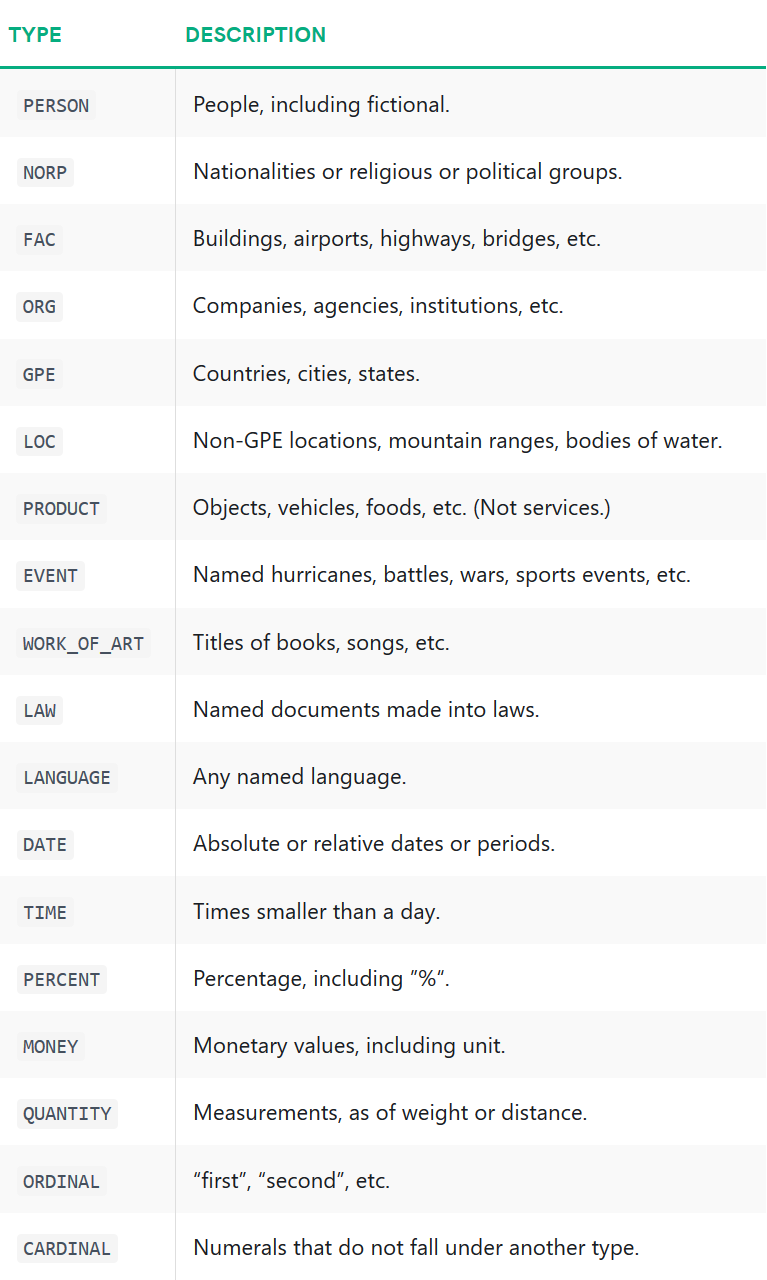

In [41]:
def replace_person_names(token):
  if token.ent_iob != 0 and token.ent_type_ == 'PERSON':
    return '[******] '
  return token.text

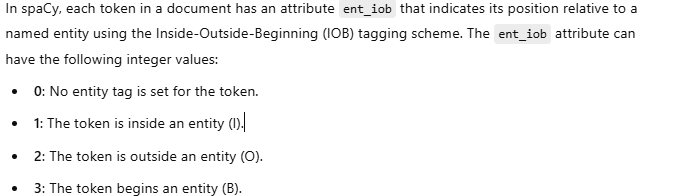

###Barack Obama was born in Hawaii

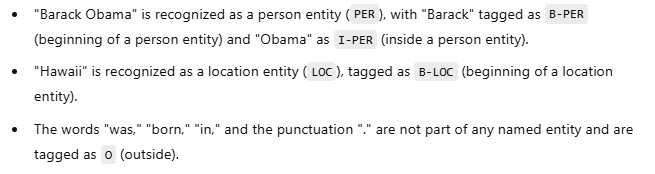

In [62]:
def hide_names(nlp_doc):
  retokenizer= nlp_doc.retokenize() # Use retokenizer context manager
  for ent in nlp_doc.ents:
     retokenizer.merge(ent) # Merge entities using retokenizer
  tokens = map(replace_person_names, nlp_doc)
  return ' '.join(tokens)

In [63]:
survey_text = ('Out of 5 people surveyed, James Robert,'
 ' Julie Fuller and Benjamin Brooks like'
 ' apples. Kelly Cox and Matthew Evans'
' like oranges.')

survey_doc = nlp(survey_text)
hide_names(survey_doc)

'Out of 5 people surveyed , [******]  [******]  , [******]  [******]  and [******]  [******]  like apples . [******]  [******]  and [******]  [******]  like oranges .'

In [44]:
#Word vectors with spaCy
#Download a larger language model to receive vector data

In [45]:
#!python -m spacy download en_core_web_lg

Later Sessions

In [46]:
def skip_and_print(*args):
    """ Act like print(), but skip a line before printing. """
    print('\n' + str(args[0]), *args[1:])

# The next definitions work together to help print tables.

col_widths = []

def row(*values):
    """ Return a str with `values` spaced by `col_widths`. """
    fmt = ' '.join('%%%ds' % width for width in col_widths)
    return fmt % tuple(values)

def hr():
    """ Return a horizontal rule str using `col_widths`. """
    size = sum(map(abs, col_widths)) + len(col_widths) - 1
    return '~' * size

In [47]:
document_string = 'happy glad cheddar munster'

print('Working with string: "%s"' % document_string)
doc = nlp(document_string)

Working with string: "happy glad cheddar munster"


In [48]:
print('Word vectors for each token:\n')
n=5
col_widths = [7, 1, -30]
print(row('Word', '|', 'Vector'))
print(hr())

for token in doc:
    v = token.vector
    v_str = ('%5.2f ' * n) % tuple(v[:n])
    print(row(token, '|', '(' + v_str + '...)'))

Word vectors for each token:

   Word | Vector                        
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  happy | ( 0.05 -0.52  0.57 -0.26 -0.59 ...)
   glad | (-0.48 -1.42  0.08 -0.71  0.77 ...)
cheddar | ( 0.41 -1.77 -0.52  1.23 -0.12 ...)
munster | (-1.08 -1.12 -0.52 -0.87  0.35 ...)


In [49]:
len(v)

96

In [50]:

tokens = nlp("dog and cat are animals. banana is not")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_punct)


dog True 8.282718 False
and True 10.871561 False
cat True 8.398324 False
are True 8.425612 False
animals True 7.872883 False
. True 10.715023 True
banana True 9.260881 False
is True 7.690164 False
not True 11.551766 False


In [51]:
#!python -m spacy download en_core_web_md

In [52]:
#nlp = spacy.load("en_core_web_md")
tokens = nlp("dog cat banana")

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

dog dog 1.0
dog cat 0.5957574844360352
dog banana 0.43743896484375
cat dog 0.5957574844360352
cat cat 1.0
cat banana 0.46431881189346313
banana dog 0.43743896484375
banana cat 0.46431881189346313
banana banana 1.0


<ipython-input-52-10fcf1718665>:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(token1.text, token2.text, token1.similarity(token2))
